# Day 5 | Probability & Statistics 101

**Exercises**  
**Central Limit Theorem : Distribution of mean of sample approximates a normal distr. on increasing sample sizes**

In [1]:
# Import required libraries

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

### Quick recap of summary statistics

- Mean 
- Median : Middle observation in sorted order
- Mode : Most freq.
- Range : Highest - lowest
- Variance : Expected squared deviation from mean/ Mean of sq. - Sq. of mean
- Std. dev : Root of mean
- Covariance : Mean of product of deviations of two R.Vs
- Correlation : Divide Covariance by std. dev of each R.V


###  Sample vs. Population

Key difference -> A population is the set of all observations/element."Sampling" a few observations from this is termed as the sample. Accordingly the formulae change.

#### Variance
<img src="https://mathbitsnotebook.com/Algebra1/StatisticsData/popformula2.gif"/>

* Why the $n-1$?  
Read up true unbiased estimator and how to use sample var. to estimate population var.


#### What if you want to find cov/corr 

# Statistical Visualizations

## 1. Histogram

Bin your data into smaller ranges and calculate frequency of each bin.

Columns in dataset: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0          

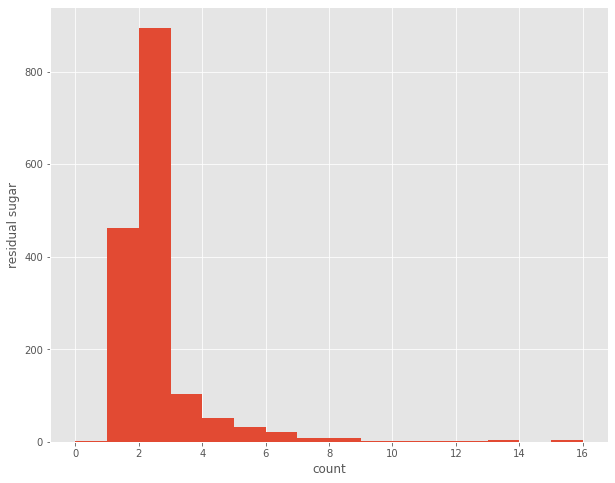

In [9]:
# read dataset
df = pd.read_csv('./winequality-red.csv',sep=';')
print(f'Columns in dataset: {list(df.columns)}')
print(df.head())

# create histogram
bin_edges = np.arange(0, df['residual sugar'].max() + 1, 1)

# add plot labels
plt.figure(figsize=(10,8))
fig = plt.hist(df['residual sugar'], bins=bin_edges)
plt.xlabel('count')
plt.ylabel('residual sugar')
plt.show()

### Histograms used to be really useful (and still are) for computer vision


Gives us low-level information of what is in the seen -> colors give a crude semantic understanding. But not limited to intensity histograms. We can extend it to any 'feature' of an image -> gradients. Gives even more useful information

In [4]:
import requests # Read from url directly

def image_from_url(url) :
    """Get image from url"""
    response = requests.get(url)
    image = np.asarray(bytearray(response.content), dtype = 'uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    return image

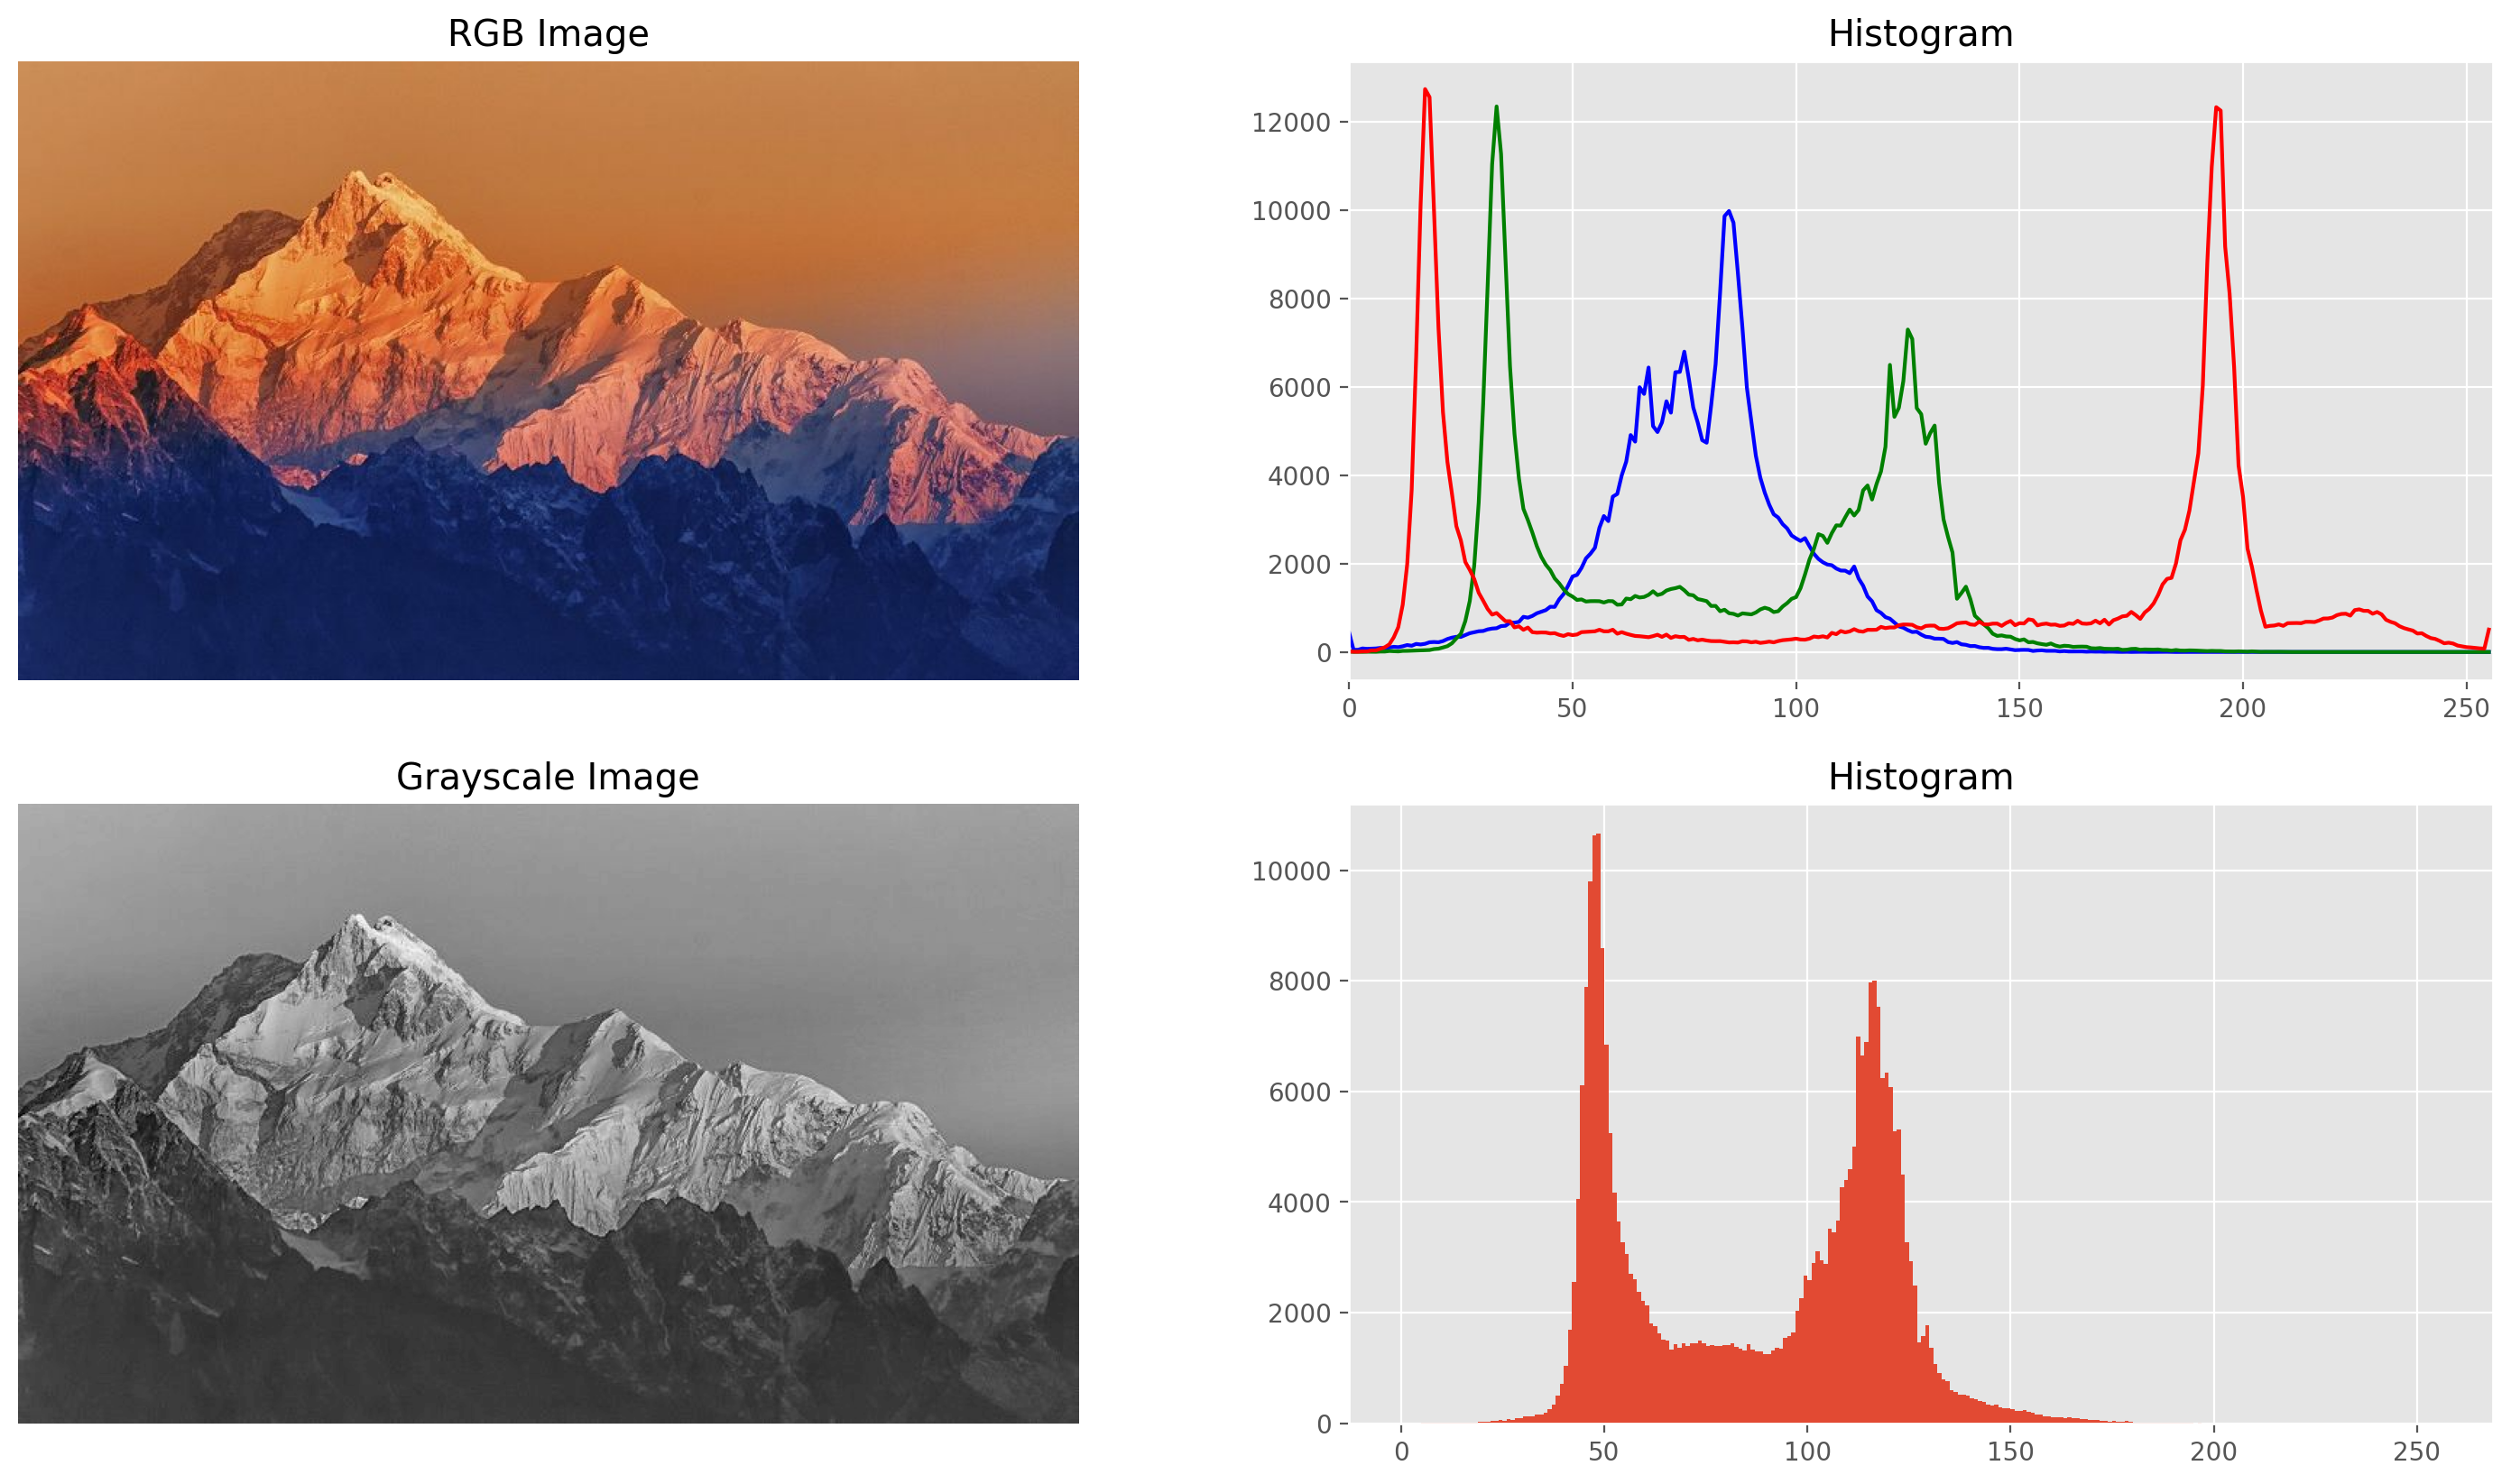

In [7]:
# Define channel colors
color = ('blue','green','red')

url = "https://www.worldatlas.com/r/w1200-h701-c1200x701/upload/66/14/d8/kangchenjunga.jpg"
image = image_from_url(url)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(18,10), dpi=200)
plt.subplot(2,2,1);plt.title('RGB Image');plt.grid(False);plt.axis(False)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2,2,2)
plt.title('Histogram')
for idx, c in enumerate(color):
    hist = cv2.calcHist([image],[idx], None, [256], [0,256])
    plt.plot(hist, color = c)
    plt.xlim([0, 256])

plt.subplot(2,2,3);plt.title('Grayscale Image');plt.grid(False);plt.axis(False);plt.imshow(gray, cmap='gray')
plt.subplot(2,2,4)
plt.title('Histogram')
plt.hist(gray.ravel(),256,[0,256])
plt.show()

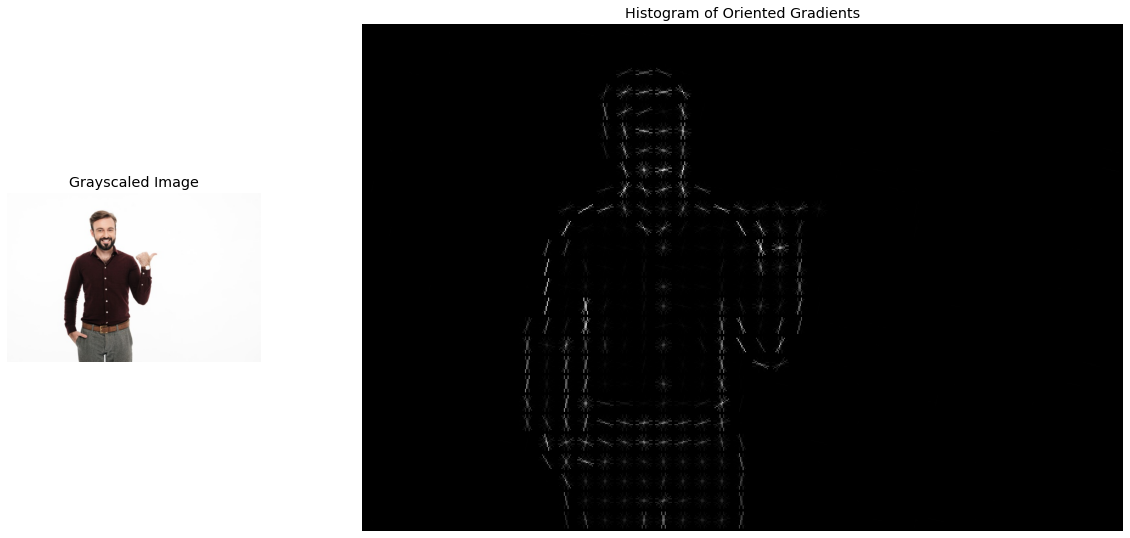

In [27]:
# Histogram of Oriented Gradients
import skimage
from skimage.feature import hog
from skimage import data, color, exposure

def hog_ft(image) :
    """Compute and display HOG descriptor for an image"""
    
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True, gridspec_kw={'width_ratios': [1, 3]})

    ax[0].axis('off')
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Grayscaled Image')
    ax[0].set_adjustable('box')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

    ax[1].axis('off')
    ax[1].imshow(hog_image, cmap=plt.cm.gray)
    ax[1].set_title('Histogram of Oriented Gradients')
    ax[1].set_adjustable('box')

    plt.show()


image = image_from_url("https://img.freepik.com/free-photo/portrait-smiling-happy-man-standing_171337-4831.jpg?size=626&ext=jpg")
hog_ft(image)

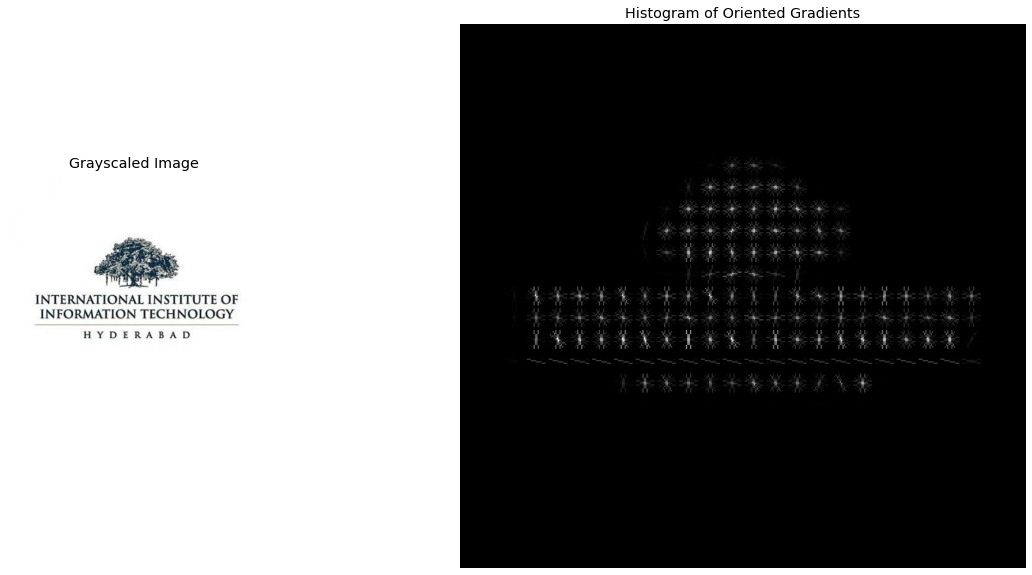

In [29]:
image = image_from_url("https://cdn.telanganatoday.com/wp-content/uploads/2018/08/IIITH_Logo-416x400-416x400.jpg")
hog_ft(image)

## 2. Scatterplot

Visualize a 2D/3D plot to observe variation of one r.v w.r.t another

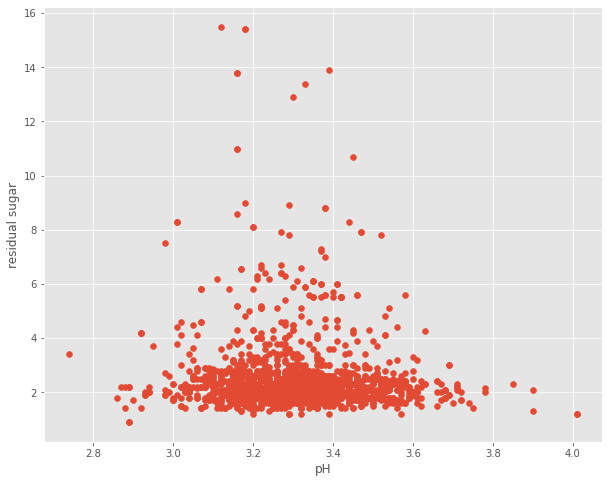

In [30]:
plt.figure(figsize=(10,8))
fig = plt.scatter(df['pH'], df['residual sugar'])
plt.xlabel('pH')
plt.ylabel('residual sugar')
plt.show()

## Covariance Matrix

Covariance between the values a R.V can take.

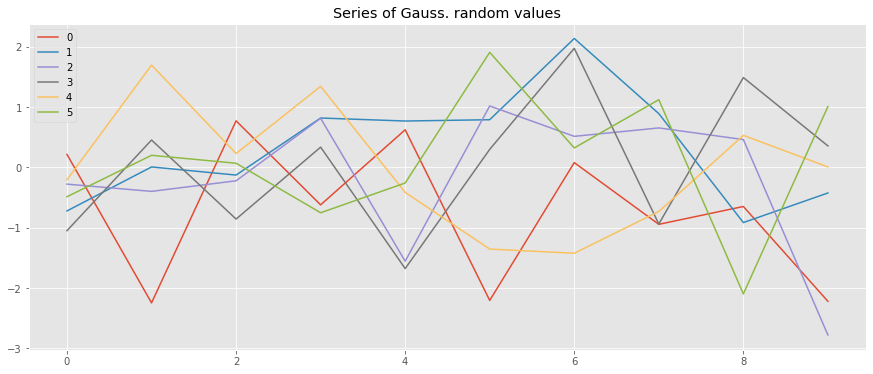

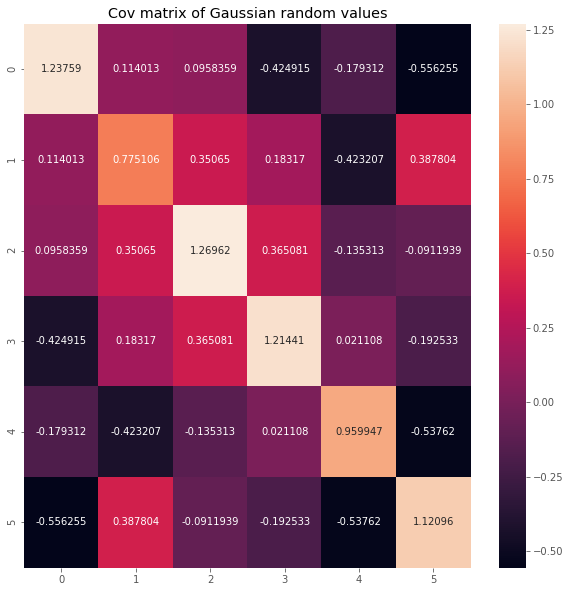

In [31]:
from scipy.stats import norm

values = norm.rvs(size=10, loc=0, scale=1)

plt.figure(figsize=(15,6))
plt.title('Series of Gauss. random values')
plt.plot(values, label='0')

for i in range(5) :
    val = norm.rvs(size=10, loc=0, scale=1)
    values = np.vstack([values, val])
    plt.plot(val, label=i+1)
plt.legend()
plt.show()

cov_mtx = np.cov(values, bias=True)
plt.figure(figsize=(10,10))
plt.title('Cov matrix of Gaussian random values')
sns.heatmap(cov_mtx, annot=True, fmt='g')
plt.show()

# Probability

## Random Variables

A variable defining an outcome of a random event. For example, outcome of a coin toss is defined by a R.V $X$ which can take values $\in \{0,1\}$. Random variables can be discrete or continuous. 

## Probability Mass Fn

Function that maps a discrete value taken by a random variable to the probability that R.V can take the value. The PMF defines the prob. distribution over a r.v.

## Probability Density Fn

Same as PMF but defined for continuous random variables.

## Cumulative Distribution Fn

Probability that $X$ will take a value less than or equal to $X=x$.

#### Resources
1. [Common probability distributions with visualization](https://www.datacamp.com/community/tutorials/probability-distributions-python)

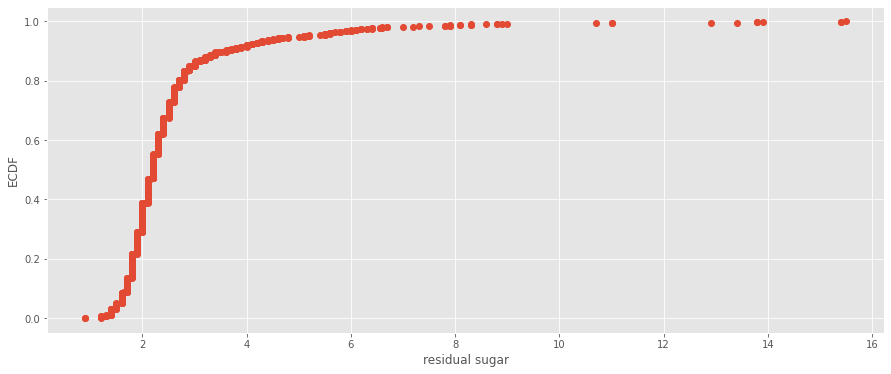

In [32]:
# CDF
x = np.sort(df['residual sugar'])
y = np.arange(1, x.shape[0] + 1) / x.shape[0]

plt.figure(figsize=(15,6))
plt.plot(x, y, marker='o', linestyle='')
plt.ylabel('ECDF')
plt.xlabel('residual sugar')
plt.show()

# Maximum Likelihood Estimation